# Single Layer LSTM

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc1


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMFUCZJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMFUCZJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteMFUCZJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
# MY TEST

pqr = tf.compat.v1.data.get_output_shapes(train_dataset)
print(pqr)

(TensorShape([None, None]), TensorShape([None]))


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 70s 180ms/step - loss: 0.5419 - accuracy: 0.7215 - val_loss: 0.7833 - val_accuracy: 0.6744
Epoch 2/10
391/391 [==============================] - 70s 178ms/step - loss: 0.3754 - accuracy: 0.8435 - val_loss: 0.4865 - val_accuracy: 0.8170
Epoch 3/10
391/391 [==============================] - 69s 176ms/step - loss: 0.3278 - accuracy: 0.8686 - val_loss: 0.5505 - val_accuracy: 0.7574
Epoch 4/10
391/391 [==============================] - 70s 180ms/step - loss: 0.2719 - accuracy: 0.8950 - val_loss: 0.4663 - val_accuracy: 0.8397
Epoch 5/10
391/391 [==============================] - 69s 177ms/step - loss: 0.2006 - accuracy: 0.9260 - val_loss: 0.4350 - val_accuracy: 0.8357
Epoch 6/10
391/391 [==============================] - 71s 181ms/step - loss: 0.1993 - accuracy: 0.9269 - val_loss: 0.4790 - val_accuracy: 0.8348
Epoch 7/10
391/391 [==============================] - 70s 180ms/step - loss: 0.1582 - accuracy: 0.9435 - val_loss: 0.5176 - val_ac

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

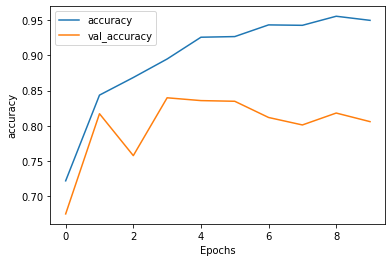

In [0]:
plot_graphs(history, 'accuracy')

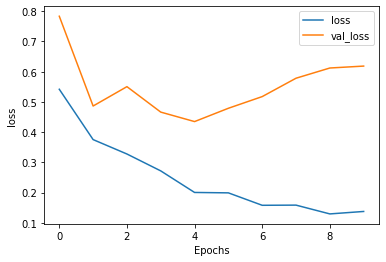

In [0]:
plot_graphs(history, 'loss')